# Anomaly Detection using Python

## Time Series Anomaly Detection

Three types of anomalies:
1. Spike
2. Level Shift
3. Pattern Change
4. Seasonality


### Spike Anomaly

In [29]:
from adtk.detector import PersistAD
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [30]:
# Load data
temp_data = pd.read_csv('data/ambient_temperature_system_failure.csv')

In [31]:
temp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  7267 non-null   object 
 1   value      7267 non-null   float64
dtypes: float64(1), object(1)
memory usage: 113.7+ KB


In [32]:
#  convert the timestamp to datetime
temp_data['timestamp'] = pd.to_datetime(temp_data['timestamp'])
temp_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  7267 non-null   datetime64[ns]
 1   value      7267 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 113.7 KB


In [33]:
temp_data = temp_data.sort_values('timestamp')

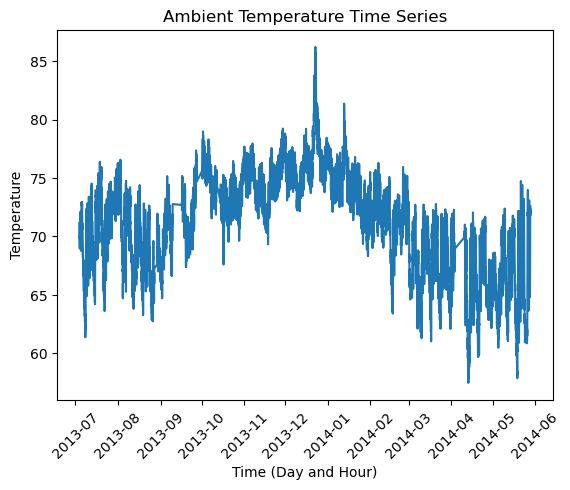

In [34]:
# plot data
sns.lineplot(data=temp_data, x='timestamp', y='value')
plt.title('Ambient Temperature Time Series')
plt.xlabel('Time (Day and Hour)')
plt.ylabel('Temperature')
plt.xticks(rotation=45)
plt.show()

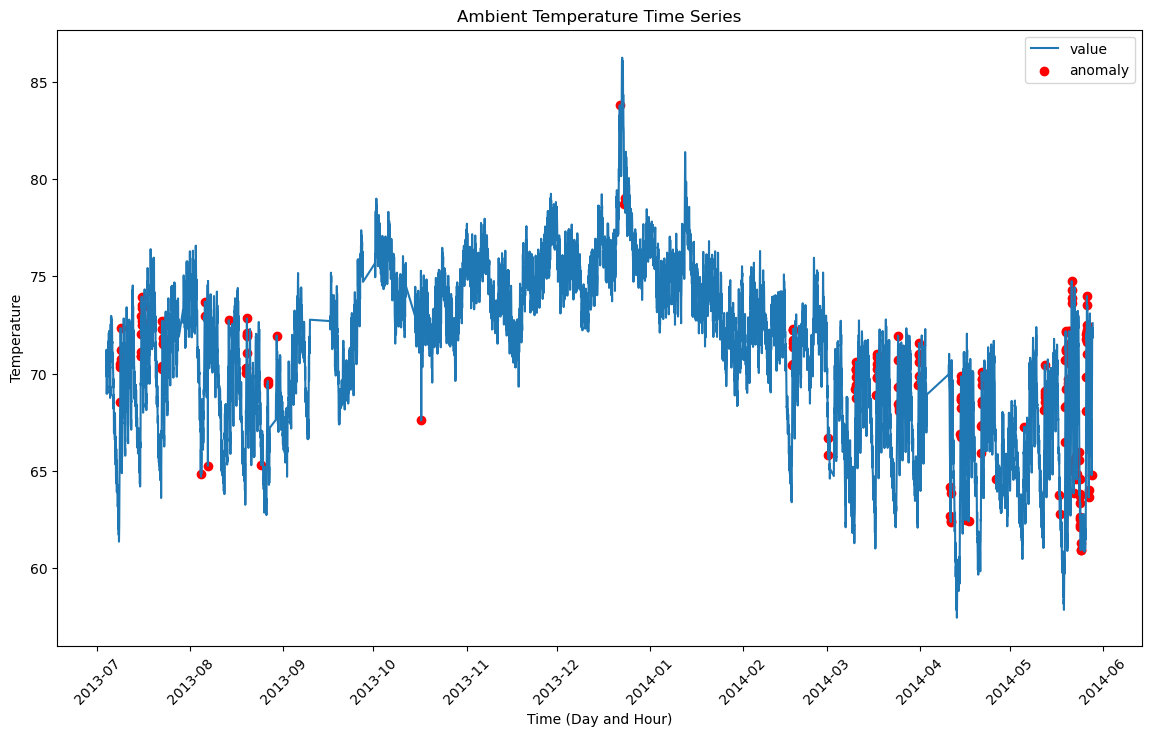

In [41]:
# Create a spike detector
spike_detector = PersistAD(window=24, c=2)

# set the index of the data to be the timestamp
anom_data = temp_data.set_index('timestamp')

# Fit detector
anomalies = spike_detector.fit_detect(anom_data['value'])


# replace the NaN values with False
anomalies = anomalies.fillna(False)

# Plot results
plt.figure(figsize=(14, 8))
plt.plot(anom_data.index, anom_data['value'], label='value')
plt.scatter(anom_data.index[anomalies], anom_data['value'][anomalies], color='red', label='anomaly')
plt.title('Ambient Temperature Time Series')
plt.xlabel('Time (Day and Hour)')
plt.ylabel('Temperature')
plt.xticks(rotation=45)
plt.legend()
plt.show()

